# <div style="text-align: center; background-color:pink; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">BUTTERFLY IMAGE CLASSIFICATION</div>


<img src="butterfly1.jpg" alt="Butterfly" width="500" height="250">

## Project Objective:
##### Developing a Butterfly Image Classification System Using Convolutional Neural Networks (CNN) and Transfer Learning with Pre-trained Models.


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load train data

df_train = pd.read_csv('Training_set.csv')
df_train.head()

filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB


In [4]:
df_train['label'].value_counts()

MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
CRECENT            97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: label, Length: 75, dtype: int64

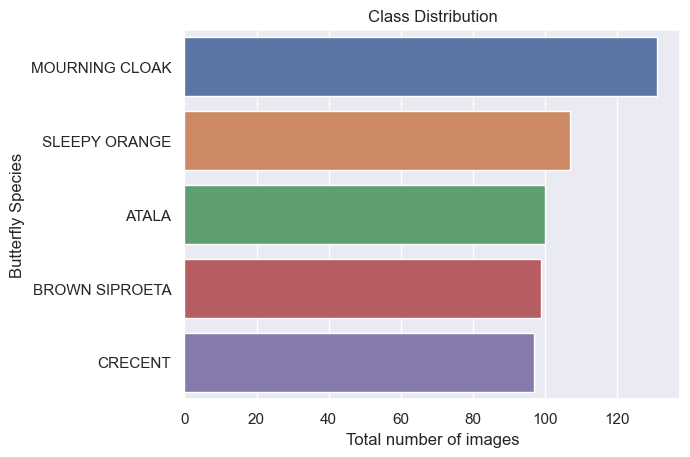

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(y='label', data=df_train, order=df_train['label'].value_counts().head(5).index)
plt.xlabel('Total number of images')
plt.ylabel('Butterfly Species')
plt.title('Class Distribution')
plt.show()

In [3]:
df_train['path'] = "C:/Users/lenovo/Downloads/Butterfly_classification/train/" + df_train['filename']
df_train.head()

filename                     label  \
0  Image_1.jpg          SOUTHERN DOGFACE   
1  Image_2.jpg                    ADONIS   
2  Image_3.jpg            BROWN SIPROETA   
3  Image_4.jpg                   MONARCH   
4  Image_5.jpg  GREEN CELLED CATTLEHEART   

                                                path  
0  C:/Users/lenovo/Downloads/Butterfly_classifica...  
1  C:/Users/lenovo/Downloads/Butterfly_classifica...  
2  C:/Users/lenovo/Downloads/Butterfly_classifica...  
3  C:/Users/lenovo/Downloads/Butterfly_classifica...  
4  C:/Users/lenovo/Downloads/Butterfly_classifica...

## TRAIN - TEST SPLIT

In [4]:
# split dataset into training and validation dataset for better results

from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(df_train, test_size = 0.3)

In [5]:
import keras
from sklearn.base import BaseEstimator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## DATA PREPROCESSING

In [6]:
# Define data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_set = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='path',
    y_col='label',
    target_size=(180, 180),
    batch_size=20,
    class_mode='sparse'
)

Found 4549 validated image filenames belonging to 75 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_set = validation_datagen.flow_from_dataframe(
    dataframe=validation_data,
    x_col='path',
    y_col='label',
    target_size=(180, 180),
    batch_size=20,
    class_mode='sparse'
)

Found 1950 validated image filenames belonging to 75 classes.


In [8]:
# Accessing the data
images, labels = next(train_set)

# Retrieving class names
class_names = train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

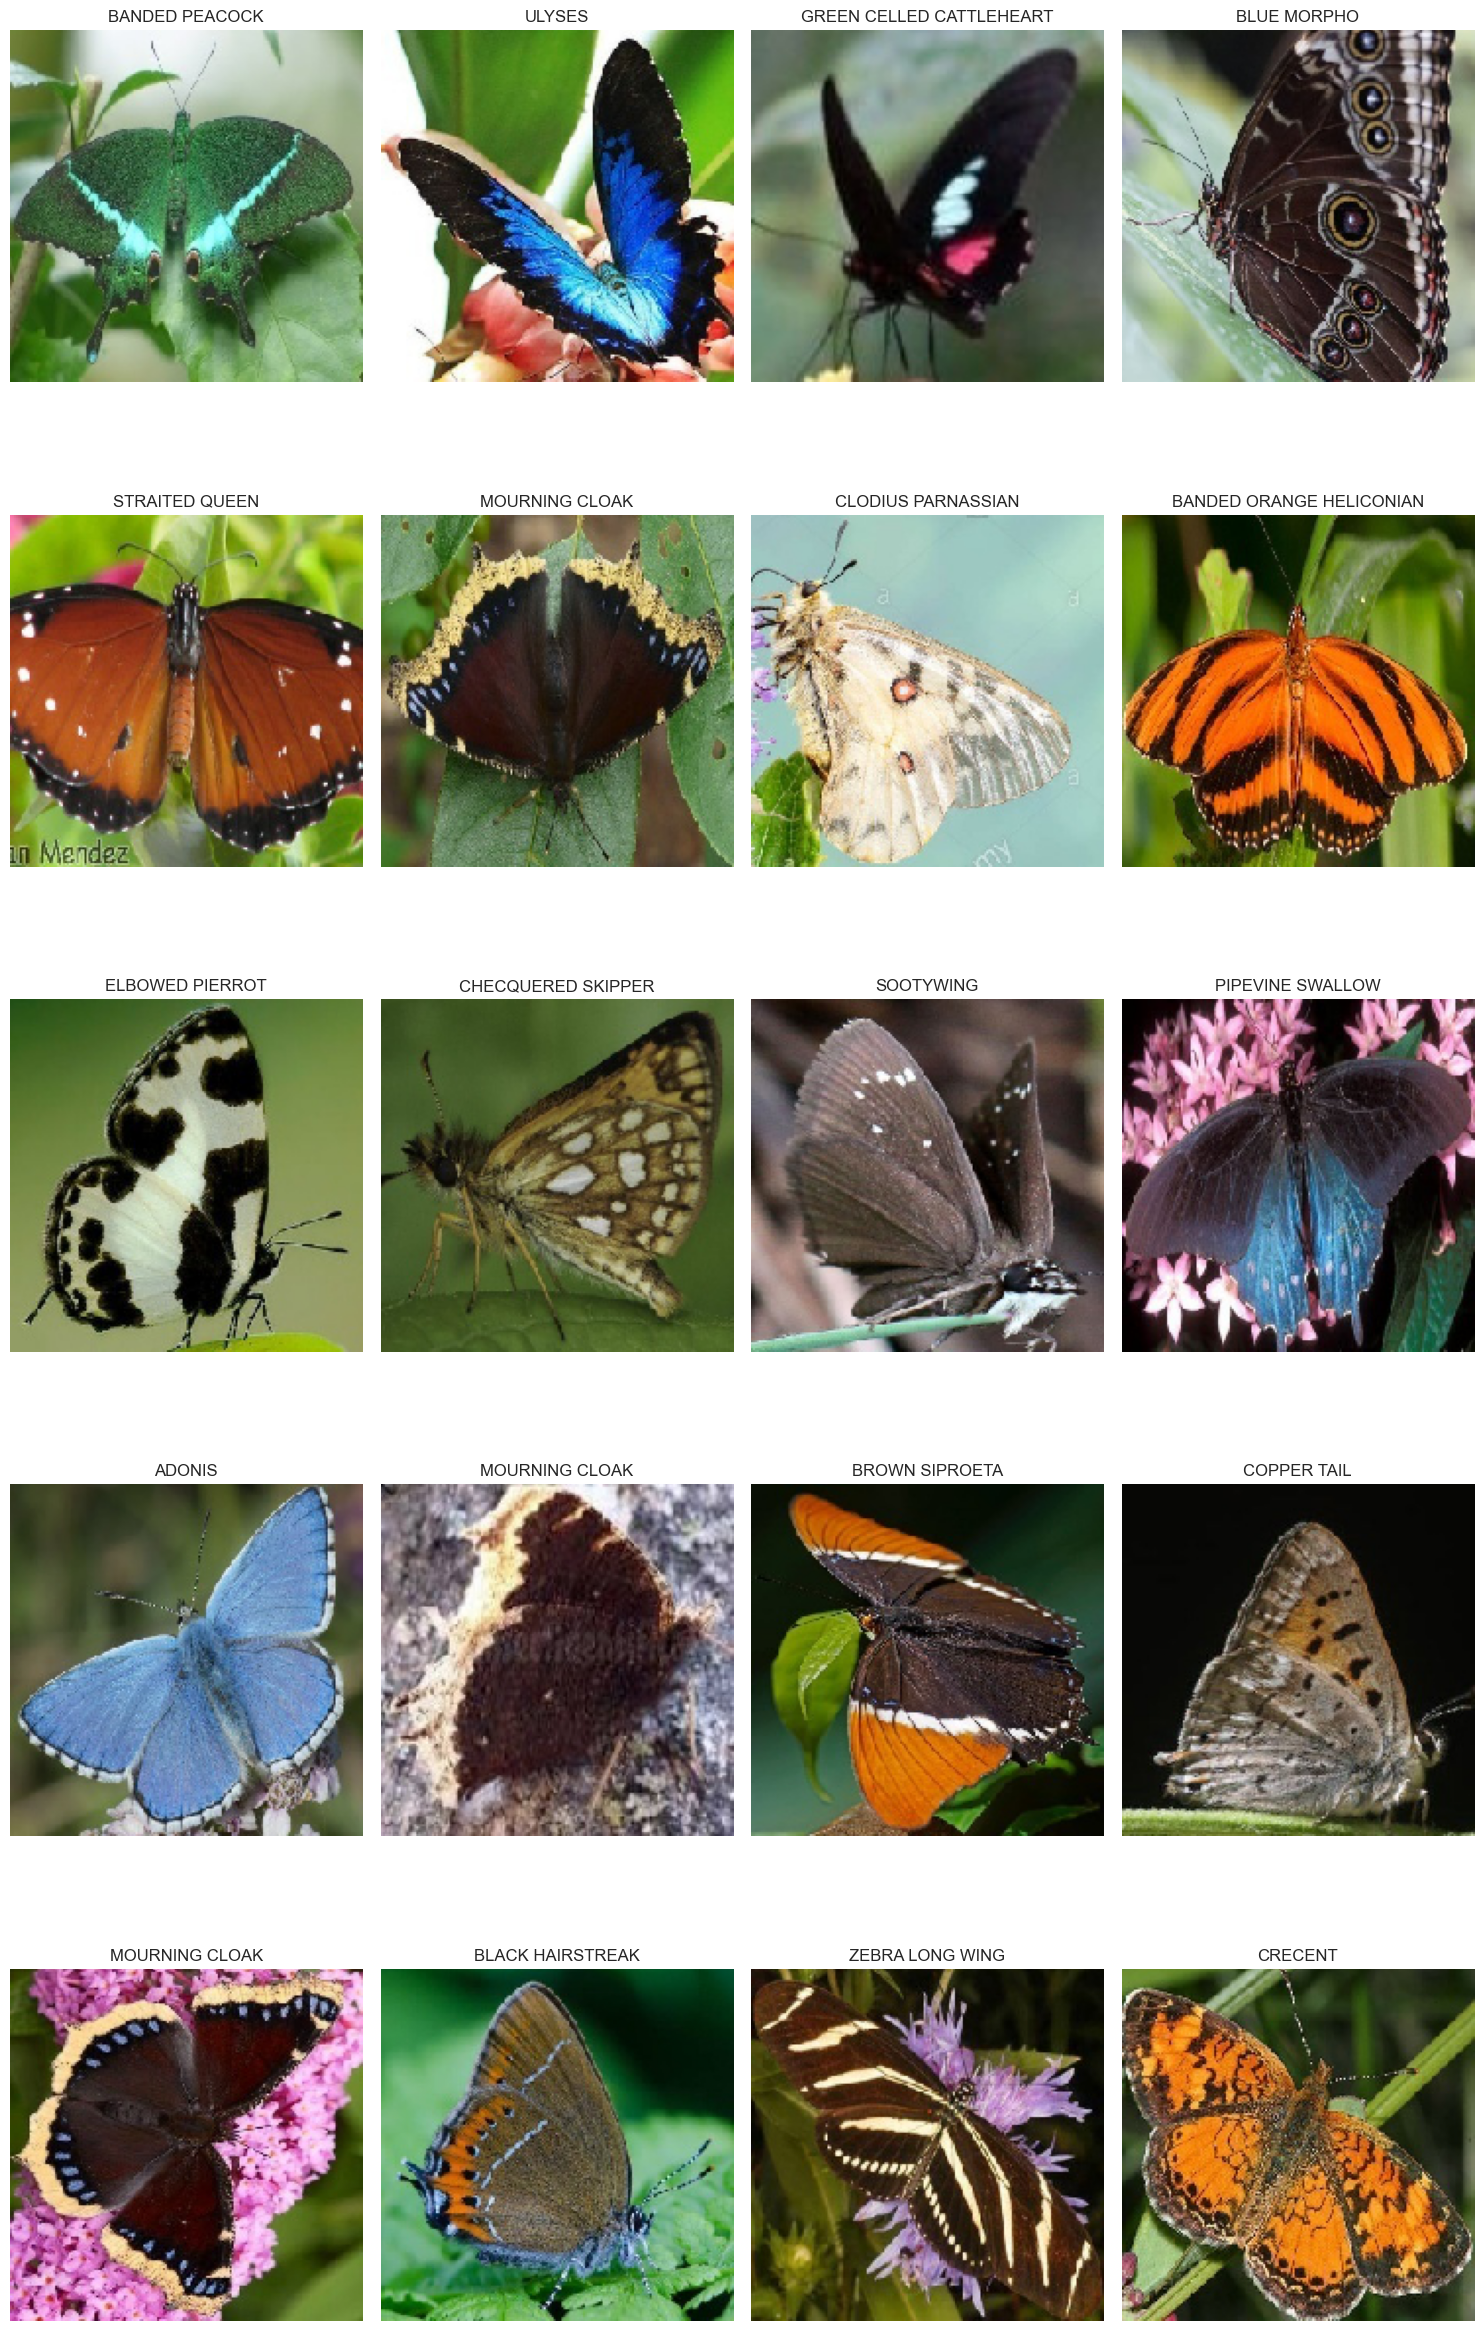

In [35]:
num_images = len(images)
num_cols = 4
num_rows = -(-num_images // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i in range(num_images):
    row_index = i // num_cols
    col_index = i % num_cols
    
    axes[row_index, col_index].imshow(images[i])
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[row_index, col_index].set_title(f"{class_name}")
    axes[row_index, col_index].axis('off')
    
plt.tight_layout()
plt.show()

## MODEL BUILDING

In [9]:
import keras
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,GlobalAveragePooling2D,GlobalMaxPool2D,MaxPooling2D,MaxPool2D,Dropout
from keras.models import Model,Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [13]:
# Build the model with BatchNormalization and Dropout layers
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(180,180,3)),
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.25),
    
    Flatten(),
    Dense(units=256, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=75, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 90, 90, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        1

In [15]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_set, epochs=50, validation_data=validation_set, callbacks=[early_stopping])

Epoch 1/50
228/228 [==============================] - 670s 3s/step - loss: 4.6250 - accuracy: 0.0503 - val_loss: 4.6236 - val_accuracy: 0.0410
Epoch 2/50
228/228 [==============================] - 660s 3s/step - loss: 3.8960 - accuracy: 0.0989 - val_loss: 3.1461 - val_accuracy: 0.1969
Epoch 3/50
228/228 [==============================] - 659s 3s/step - loss: 3.3848 - accuracy: 0.1574 - val_loss: 3.2231 - val_accuracy: 0.2005
Epoch 4/50
228/228 [==============================] - 652s 3s/step - loss: 3.0501 - accuracy: 0.2152 - val_loss: 2.5555 - val_accuracy: 0.3179
Epoch 5/50
228/228 [==============================] - 651s 3s/step - loss: 2.7860 - accuracy: 0.2669 - val_loss: 2.7856 - val_accuracy: 0.3072
Epoch 6/50
228/228 [==============================] - 517s 2s/step - loss: 2.5176 - accuracy: 0.3102 - val_loss: 2.7359 - val_accuracy: 0.2985
Epoch 7/50
228/228 [==============================] - 500s 2s/step - loss: 2.3502 - accuracy: 0.3552 - val_loss: 2.1576 - val_accuracy: 0.4277

In [17]:
# Visualize training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


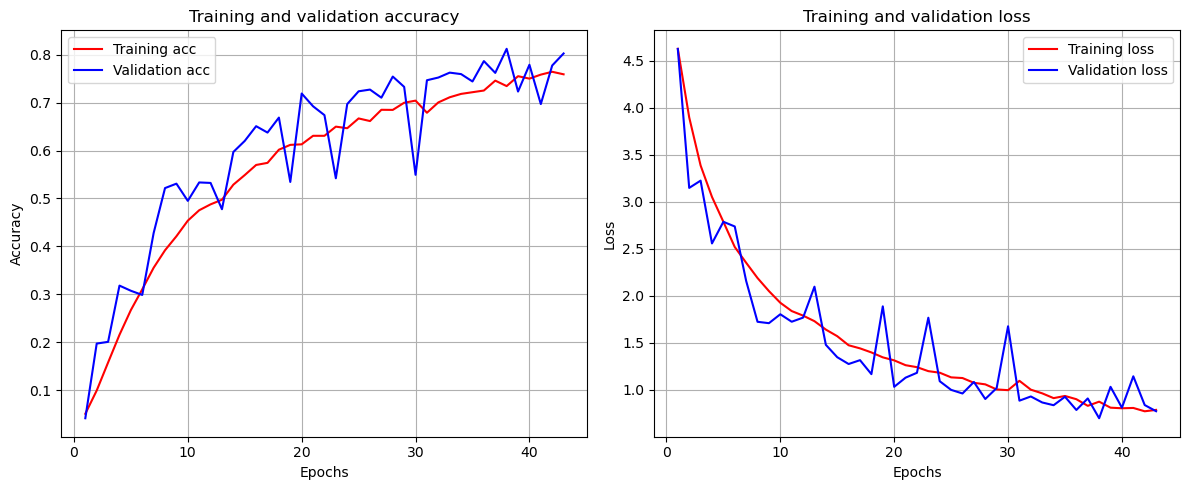

In [18]:
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Transfer Learning

Using a pre-trained model like InceptionV3 can help improve accuracy by leveraging the knowledge learned from training on a large dataset like ImageNet. Fine-tuning the model on our dataset allows it to learn features specific to our task while retaining the general features learned from the ImageNet dataset.

In [22]:
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [23]:
# Load the pre-trained InceptionV3 model without the top layer (include_top=False)

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

In [24]:
# Add our own classification layers on top of the base model

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(256, activation='relu')(x)  # Dense layer with ReLU activation
predictions = Dense(75, activation='softmax')(x)  # Output layer with softmax activation for 75 classes

In [25]:
# Combine the base model with our classification layers

model = Model(inputs=base_model.input, outputs=predictions)

In [26]:
# Freeze the layers in the base model to prevent them from being updated during training

for layer in base_model.layers:
    layer.trainable = False

In [27]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model

history = model.fit(train_set, epochs=20, validation_data=validation_set, callbacks=[early_stopping])

Epoch 1/20
228/228 [==============================] - 237s 1s/step - loss: 2.5199 - accuracy: 0.3785 - val_loss: 1.4846 - val_accuracy: 0.5872
Epoch 2/20
228/228 [==============================] - 206s 903ms/step - loss: 1.3208 - accuracy: 0.6349 - val_loss: 1.1277 - val_accuracy: 0.6687
Epoch 3/20
228/228 [==============================] - 199s 875ms/step - loss: 0.9514 - accuracy: 0.7274 - val_loss: 0.9782 - val_accuracy: 0.7190
Epoch 4/20
228/228 [==============================] - 199s 873ms/step - loss: 0.8509 - accuracy: 0.7501 - val_loss: 0.9271 - val_accuracy: 0.7364
Epoch 5/20
228/228 [==============================] - 198s 869ms/step - loss: 0.7410 - accuracy: 0.7716 - val_loss: 0.8784 - val_accuracy: 0.7456
Epoch 6/20
228/228 [==============================] - 204s 895ms/step - loss: 0.6908 - accuracy: 0.7898 - val_loss: 0.8198 - val_accuracy: 0.7636
Epoch 7/20
228/228 [==============================] - 195s 856ms/step - loss: 0.6244 - accuracy: 0.8066 - val_loss: 0.7875 - va

In [29]:
# Visualize training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

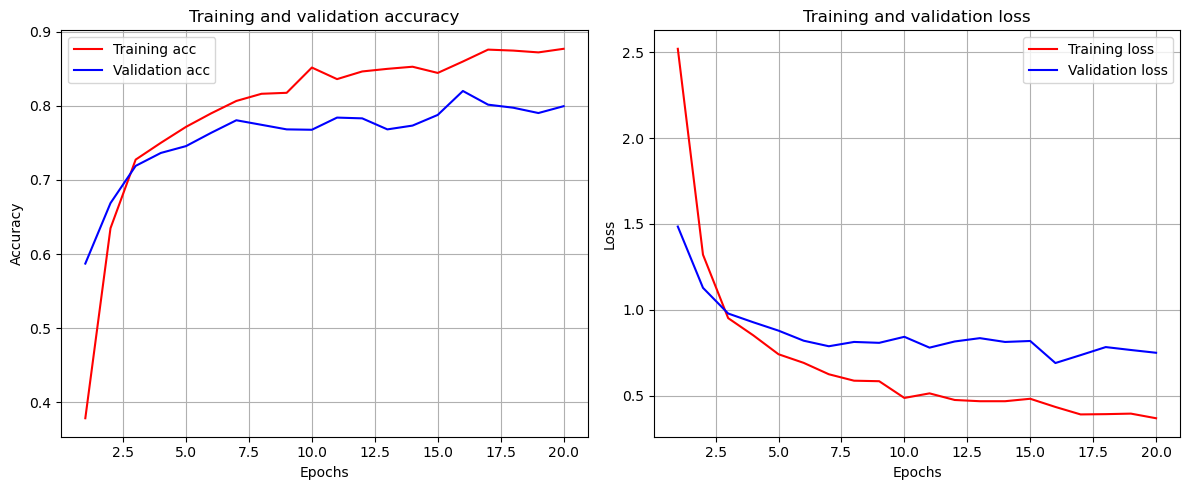

In [30]:
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()